In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

from keras.datasets import boston_housing

In [14]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [8]:
C = x_test[0].shape

C

(13,)

In [66]:
i = Input(shape=C)
x = Dense(32,activation='relu')(i)
x = BatchNormalization(momentum=0.8)(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization(momentum=0.8)(x)
x = Dense(128,activation='relu')(x)
x = BatchNormalization(momentum=0.8)(x)
x = Dense(1)(x)

model = Model(i,x)

In [67]:
model.compile(
    loss='mse',
    optimizer=tf.optimizers.SGD(lr=0.01)
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [68]:
r = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
13/13 [==============================] - 1s 19ms/step - loss: 222.6729 - val_loss: 39.4669
Epoch 2/500
13/13 [==============================] - 0s 6ms/step - loss: 34.1729 - val_loss: 24.5311
Epoch 3/500
13/13 [==============================] - 0s 5ms/step - loss: 23.1921 - val_loss: 32.5449
Epoch 4/500
13/13 [==============================] - 0s 5ms/step - loss: 24.3015 - val_loss: 31.3325
Epoch 5/500
13/13 [==============================] - 0s 5ms/step - loss: 23.9898 - val_loss: 38.1559
Epoch 6/500
13/13 [==============================] - 0s 5ms/step - loss: 22.3047 - val_loss: 47.7886
Epoch 7/500
13/13 [==============================] - 0s 7ms/step - loss: 24.3060 - val_loss: 26.2257
Epoch 8/500
13/13 [==============================] - 0s 6ms/step - loss: 22.8530 - val_loss: 55.2030
Epoch 9/500
13/13 [==============================] - 0s 5ms/step - loss: 20.3338 - val_loss: 27.4983
Epoch 10/500
13/13 [==============================] - 0s 6ms/step - loss: 18.7308 - val_l

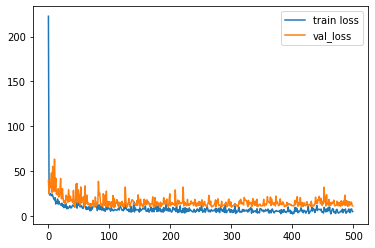

In [69]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

In [73]:
scores = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 7ms/step - loss: 11.0199


In [77]:
np.sqrt(scores)

3.3196279740151993